# 6.5 Machine Learning - Trial 2

This script contains the following: using newer dataset, cleaned with house_size and price - outliers removed
1. Importing libraries
2. The elbow technique
3. k-means clustering

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nancykray/Desktop/Real Estate Project'

In [4]:
df = pd.read_pickle(os.path.join(path,'Prepared Data', 'df_clean7.pkl'))

In [5]:
df.shape

(2213729, 13)

In [6]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Price category
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.000,0,Middle price
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.000,0,Low price
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.000,0,Low price
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.000,0,Middle price
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,2715.133,0,Low price


### 2. Data Cleaning
Preprocessing data to remove categorical variables

In [7]:
# drop columns with categorical variables (non-numeric)

df_1= df.select_dtypes(include=[np.number])

In [8]:
# Check columns
df_1.columns

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'zip_code',
       'house_size'],
      dtype='object')

In [9]:
df_1.shape # dropped 5 columns: status, city, state, prev_sold_date, and price category

(2213729, 8)

In [10]:
# take out 4 more columns since we also do not need brokered_by, street, prev_sold_date, or zip_code

var_to_include = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

In [11]:
df_2 = df_1[var_to_include]

In [12]:
#check dataframe columns
df_2.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

In [13]:
df_2.shape # now we are working with 5 relevant columns, all numeric

(2213729, 5)

### 2. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-2.2783179943478193e+18,
 -1.2373542676632696e+18,
 -7.263559599298862e+17,
 -4.859876022721682e+17,
 -3.482361666834892e+17,
 -2.5198001444270432e+17,
 -1.890539228477479e+17,
 -1.4234611047475709e+17,
 -1.1784518162835058e+17]

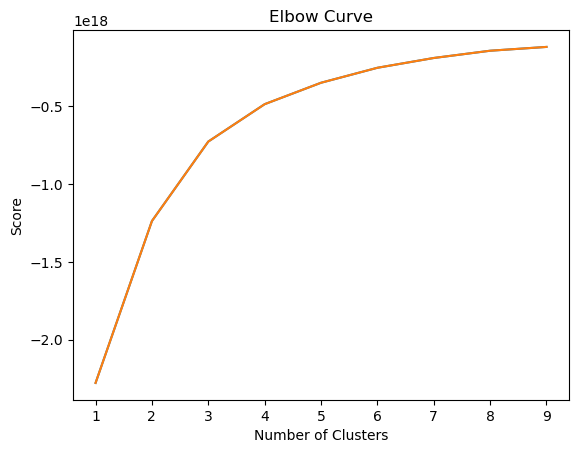

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.plot(num_cl,score)
pl.savefig('elbow_curve_2.png')
pl.show()

####  In this example, there's a jump from two to three on the x-axis, but after that, the curve straightens out with a very slight incine This means that the optimal count for your clusters is 3

### 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
df_2['clusters'] = kmeans.fit_predict(df_2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_31051/1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [20]:
df_2.head() # check that the new 'clusters' column is there

,price,bed,bath,acre_lot,house_size,clusters
0,105000.0,3.0,2.0,0.12,920.000,0
1,80000.0,4.0,2.0,0.08,1527.000,0
2,67000.0,2.0,1.0,0.15,748.000,0
3,145000.0,4.0,2.0,0.10,1800.000,0
4,65000.0,6.0,2.0,0.05,2715.133,0


In [21]:
# Save the dataset to an Excel file
df_2.to_excel('clustered_data.xlsx', index=False)


ValueError: This sheet is too large! Your sheet size is: 2213729, 6 Max sheet size is: 1048576, 16384

In [22]:
df_2['clusters'].value_counts()

clusters
0    2153559
2      57654
1       2516
Name: count, dtype: int64

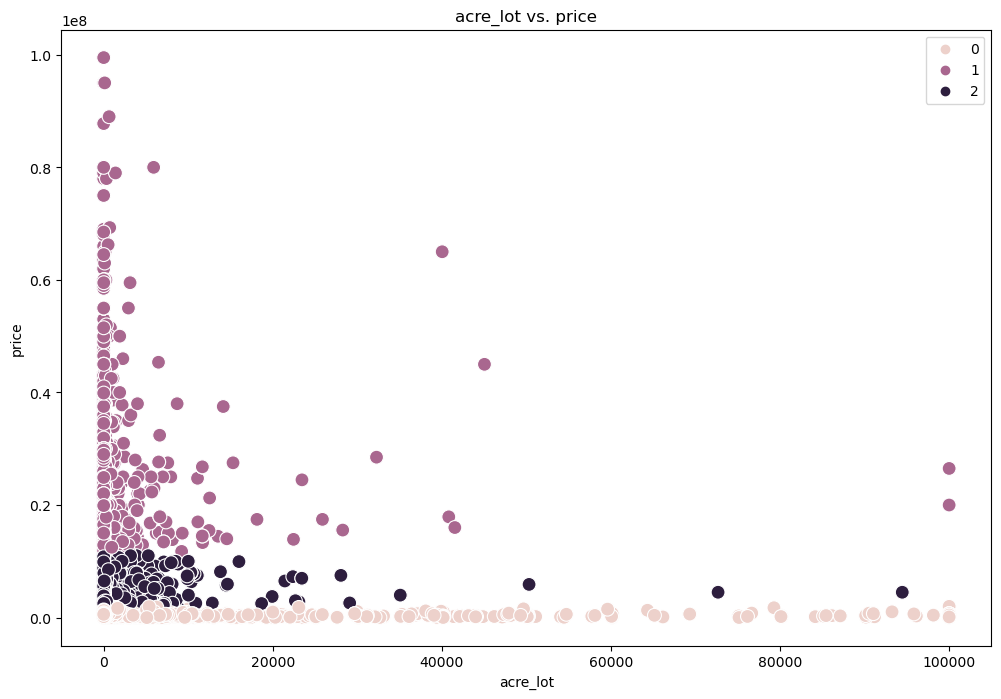

In [23]:
# Plot the clusters for the "price" and "acre_lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['acre_lot'], y=df_2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('acre_lot vs. price')
plt.xlabel('acre_lot') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.savefig('cluster_acre_price.png')
plt.show()# Plot the clusters for the "price" and "acre_lot" variables.


##### The clusters can be interpreted meaningfully in the context size of price per acre lot.
##### Cluster 0 represents lower priced homes.
##### Cluster 1 represents high priced homes
##### Cluster 2 represents very high priced homes

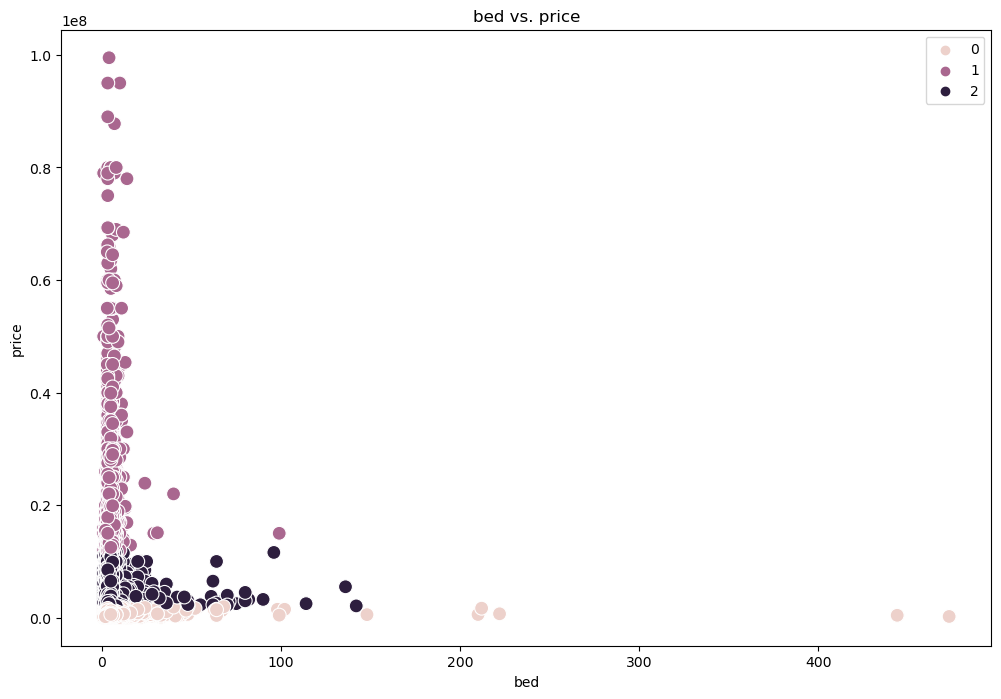

In [25]:
# Plot the clusters for the "bed" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['bed'], y=df_2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('bed vs. price')
plt.xlabel('bed') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.savefig('cluster_bed_price.png')
plt.show()


##### The clusters can be interpreted meaningfully in the context of size of price and number of bedrooms in the home.
##### Cluster 0 represents lower priced homes.
##### Cluster 1 represents high priced homes
##### Cluster 2 represents very high priced homes

In [26]:
df_2['house_size'].mean()

2183.0731651733345

In [27]:
df_2['house_size'].median()

2156.0

In [28]:
df_2['house_size'].max()

10000.0

In [29]:
df_2['house_size'].min()

4.0

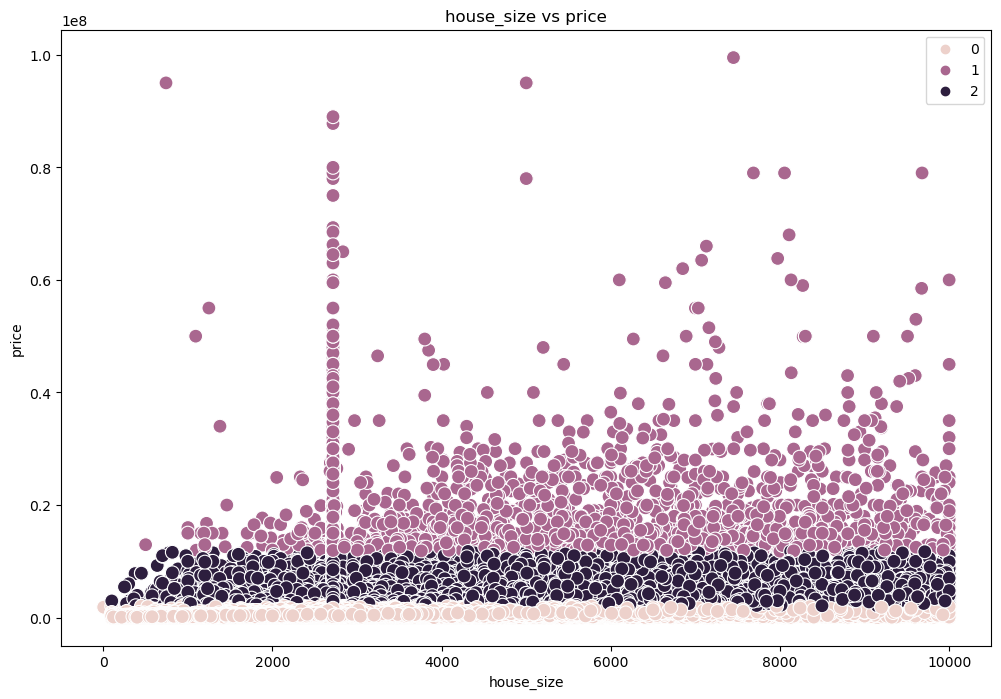

In [30]:
# Plot the clusters for the "house_size" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['house_size'], y=df_2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('house_size vs price')
plt.xlabel('house_size') # Label x-axis.
plt.ylabel('price') # Label y-axis.
pl.savefig('cluster_house_price.png')
plt.show()

##### This shows that cluster 0 has outliers with huge house sizes.  THe other 2 clusters stay within a certain range for house size.

In [31]:
# Descriptive stats for clusters
cluster_stats = df_2.groupby('clusters').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

            price                                                      \
            count          mean           std         min         max   
clusters                                                                
0         2153559  3.999953e+05  3.488200e+05         1.0   2054250.0   
1            2516  1.979847e+07  1.044714e+07  11758560.0  99500000.0   
2           57654  3.708623e+06  1.814407e+06   2055000.0  11750000.0   

              bed                                  ... acre_lot              \
            count      mean       std  min    max  ...    count        mean   
clusters                                           ...                        
0         2153559  3.236765  1.191746  1.0  473.0  ...  2153559   11.177102   
1            2516  4.814525  2.739966  1.0   99.0  ...     2516  517.354877   
2           57654  4.220030  2.426007  1.0  142.0  ...    57654   56.399804   

                                      house_size                            \
        

#### Interpretation of Descriptive Statistics:
#### Variability and Spread: The standard deviation values indicate that there is considerable variability within clusters, making this data hard to interpret.  The only variable with lower SD is 'bed', as clusters 0 has SD of 1.19 and cluster 1 has SD of 2.74


In [32]:
df_2.groupby('clusters').agg({'bed': ['mean', 'median', 'std'],
                            'acre_lot':['mean', 'median', 'std'],
                            'house_size': ['mean', 'median', 'std']})

bed                     acre_lot                      \
              mean median       std        mean median          std   
clusters                                                              
0         3.236765    3.0  1.191746   11.177102   0.26   690.014594   
1         4.814525    4.0  2.739966  517.354877   0.65  3788.575411   
2         4.220030    4.0  2.426007   56.399804   0.35   727.412470   

           house_size                       
                 mean  median          std  
clusters                                    
0         2138.401785  2116.0   893.360899  
1         5009.599261  4585.5  2311.642141  
2         3728.341718  2984.0  1817.332891